# Preparation

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

# change working diretory
# import os
# os.chdir("/content/gdrive/MyDrive/Dissertation/")

Mounted at /content/gdrive


In [7]:
!ls runs/detect
# %cd drive/MyDrive/Dissertation

ls: cannot access 'runs/detect': No such file or directory


Make sure GPU work fine.

In [8]:
!nvidia-smi

Tue Aug  1 19:57:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Make sure we are in the right working directory.

In [9]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8.

In [10]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.4/166.8 GB disk)


In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

# Training on the original dataset

Download the dataset (version 1).

Train:Val:Test = 7:2:1

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-qo6jh")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-1 in yolov8:: 100%|██████████| 2014/2014 [00:00<00:00, 3018.78it/s]


## Training the Model

In [ ]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True  # 25
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/best.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True  # 50

# !yolo task=detect mode=train model={HOME}/runs/detect/train6/weights/last.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True  # 400

# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/400.pt data={dataset.location}/data.yaml epochs=100 lr=0.0001 imgsz=640 plots=True  # not start



!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=640 plots=True  # 300



/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-1/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

In [ ]:
!ls {HOME}/runs/detect/train3/  # check the model is prodeced

args.yaml					     train_batch0.jpg
events.out.tfevents.1690800663.964f973221c7.14087.0  train_batch1.jpg
results.csv					     train_batch2.jpg
results.png					     weights


Plot the training process. From the metrics/mAP50 and metrics/mAP50-95, we can see the model converges in around 200th epoch.

/content


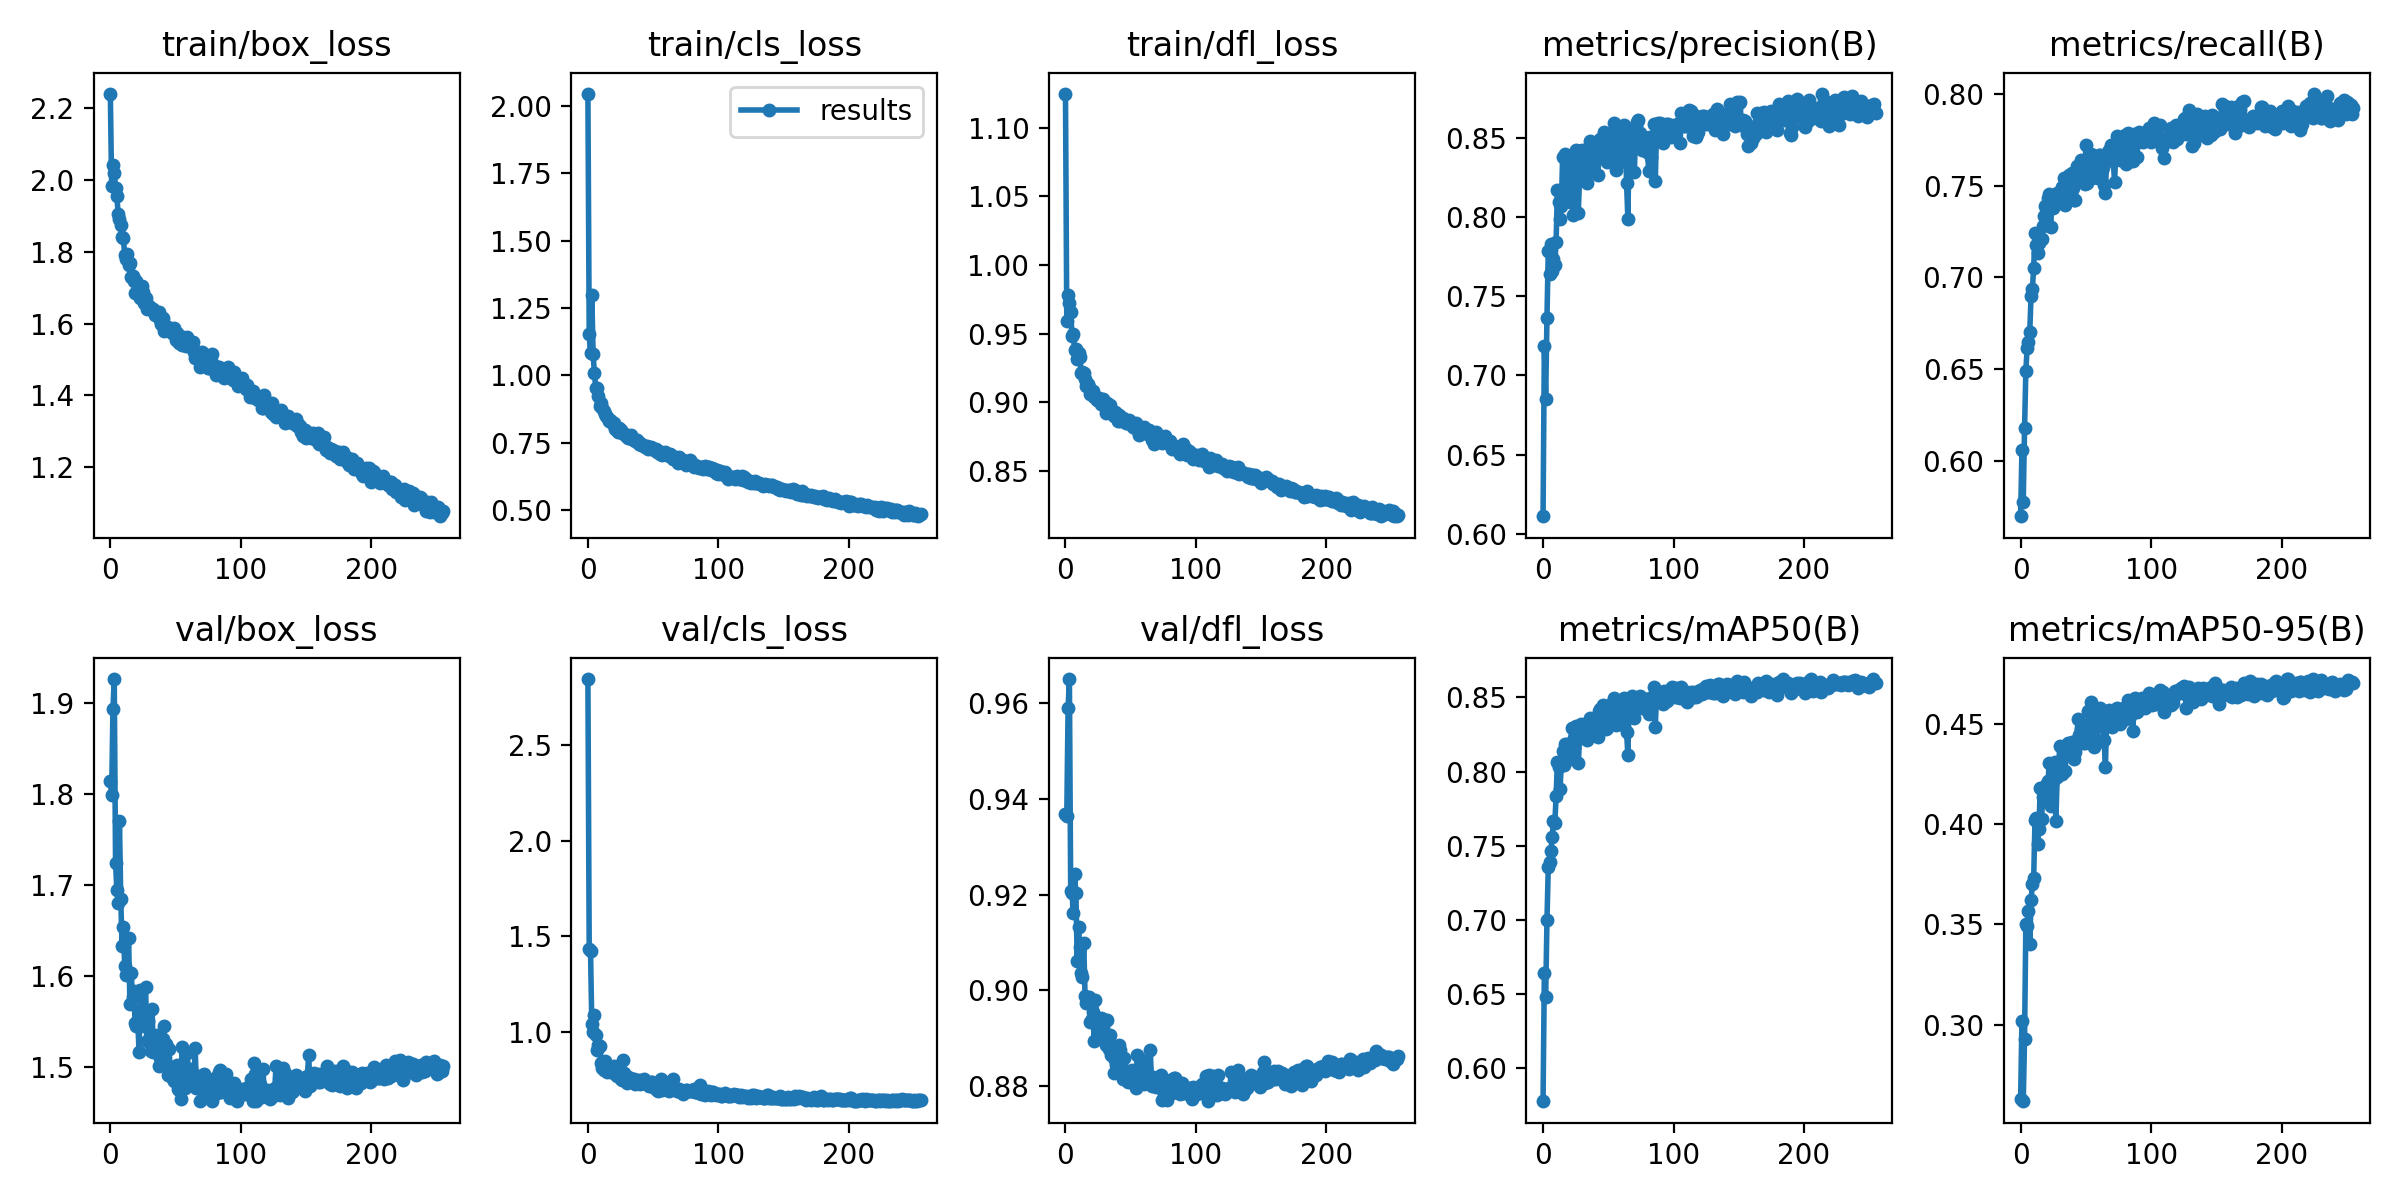

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=700)

Save current model to Google Drive.

In [ ]:
%cp {HOME}/runs/detect/train3/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models


Copy the model to "weights" folder.

In [ ]:
# %cp /content/gdrive/My\ Drive/Dissertation/Models/best.pt  {HOME}/runs/detect/train2/weights


## Validate the Model

The performance on the validation set is close to that on the training set. It seems there is no overfitting, and the model converge well.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-31 13:31:38.208419: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 13:31:39.157851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:17<00:00,  1.36s/it]
                   all        200       7992      0.869       0.79      0.863      0.471
Speed: 0.7ms pre-process, 6.0ms infere

## Inference with the Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-31 13:43:44.677231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 13:43:45.523668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/100 /content/datasets/MinneApple-1/test/images/20150919_174151_image121_png_jpg.rf.b7fc2478313627f87bcbeb831933faf2.jpg: 640x384 103 apples, 60.2ms
image 2/100 /content/datasets/MinneApple-1/test/images/20150919_174151_image161_png_jpg.rf.5e7093b1eab8189a7bb39c635604d7d4.jpg: 640x384 124 apples, 10.8ms
image 3/100 /content/datasets/MinneApple-1/test/images/20150919_174151_image

**NOTE:** Let's take a look at few results.

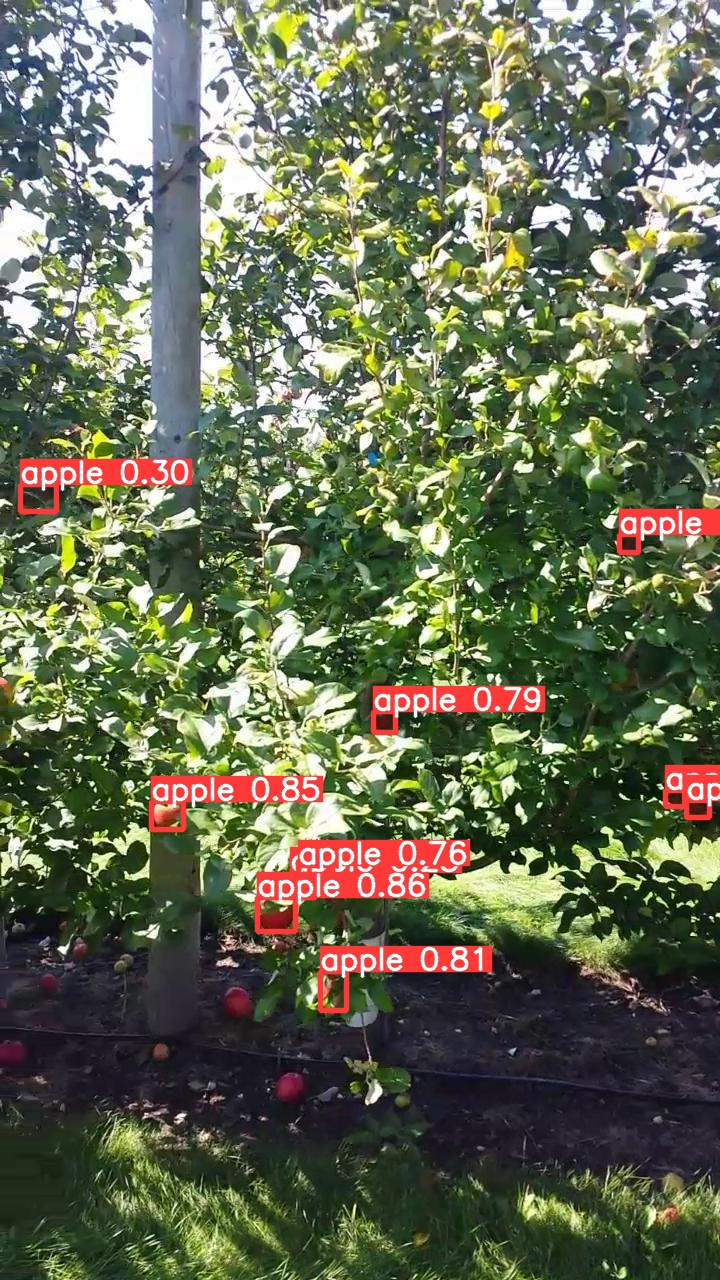

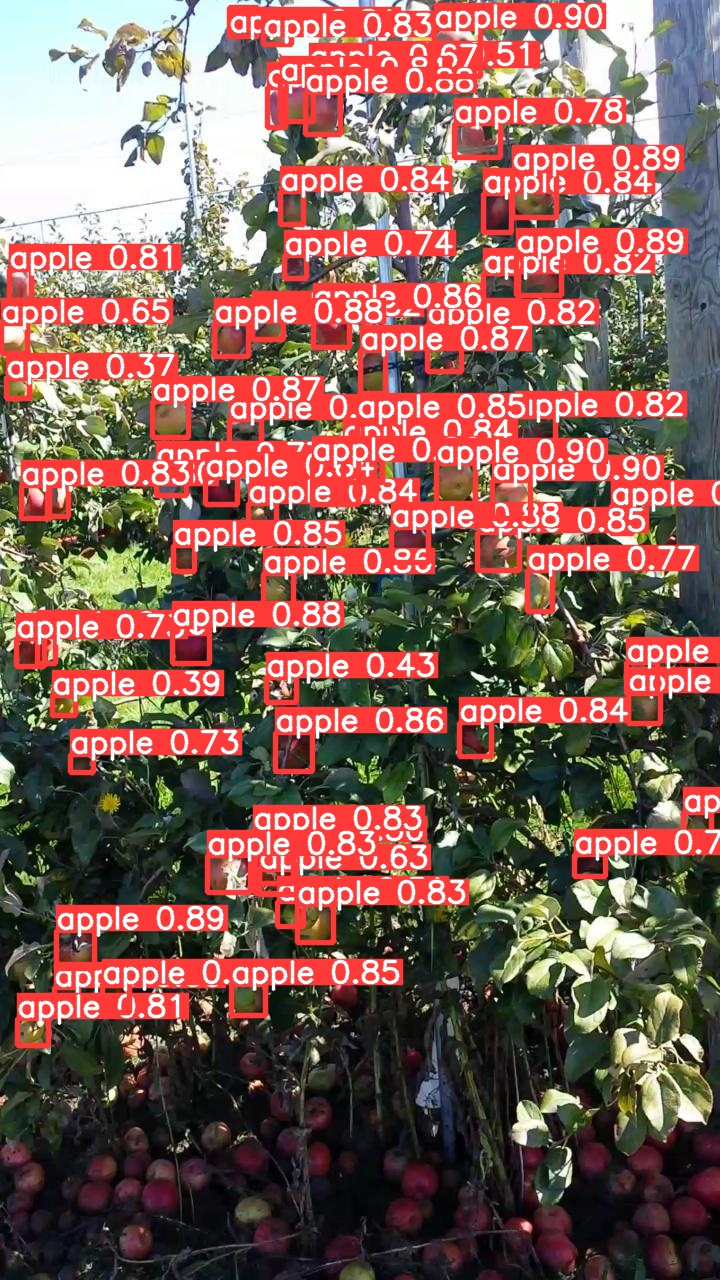

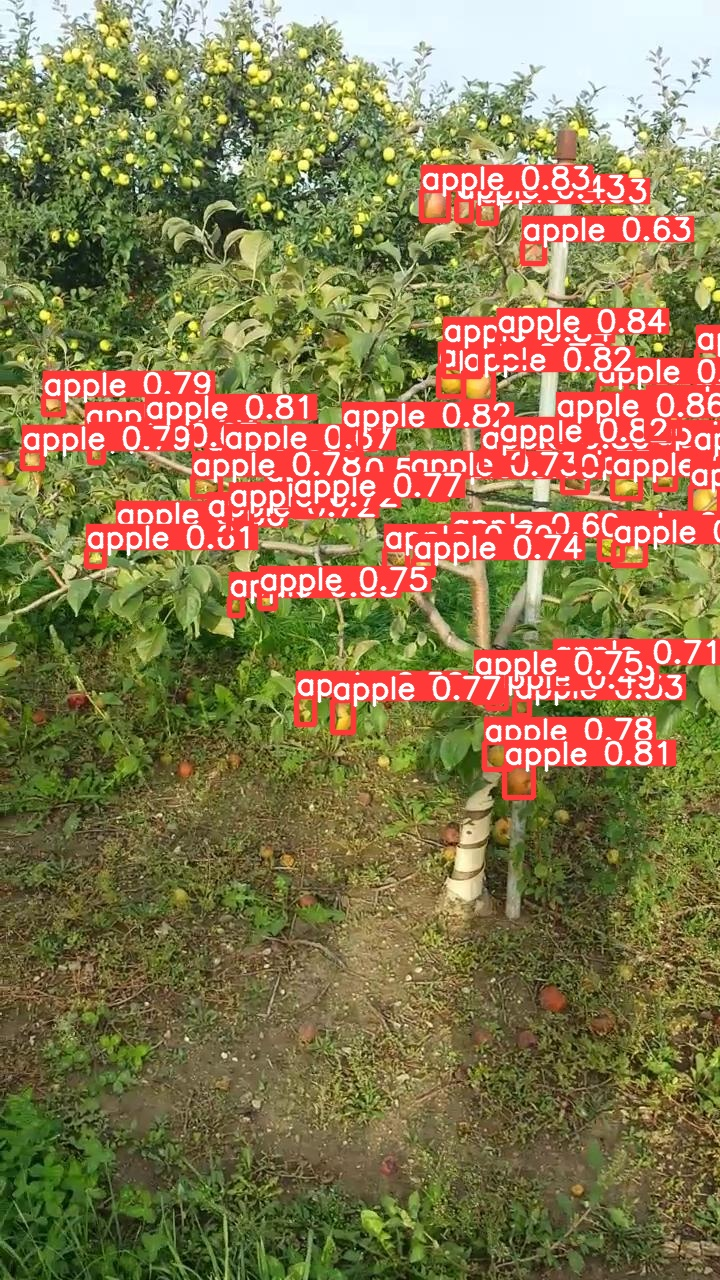

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

Produce the performance of the model on the test set.

The precision is a bit (i.e. 0.1-0.2) lower than the training and validating results, but all other metrics are much higher.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data_test.yaml

/content
2023-07-31 15:42:48.037634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 15:42:48.916944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-1/test/labels... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<00:00, 1354.12it/s]
val: New cache created: /content/datasets/MinneApple-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:16<00:00,  2.33s/it]
                   all        100       3943      0.8

# Train on the Augmented Dataset

Download the augmented dataset.

There are 1.4k raining images.

In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-qo6jh")
dataset = project.version(4).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-4 in yolov8:: 100%|██████████| 3416/3416 [00:01<00:00, 2780.82it/s]


## Train the model

After training for 300 epoches, it continued to train, and the training finnaly ended at 52th epoch as no improvements.

In [15]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=640 plots=True  # 300

!yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/aug300.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True  # 500


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-4/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

Save current model to Google Drive.

In [21]:
!ls {HOME}/runs/detect/train/  # check the model is prodeced

args.yaml					    train_batch0.jpg
events.out.tfevents.1690920104.ab2ef25261ab.6030.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [24]:
%cp {HOME}/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models

Plot the training process. From the metrics/mAP50 and metrics/mAP50-95, we can see the model converges in around 200th epoch.

/content


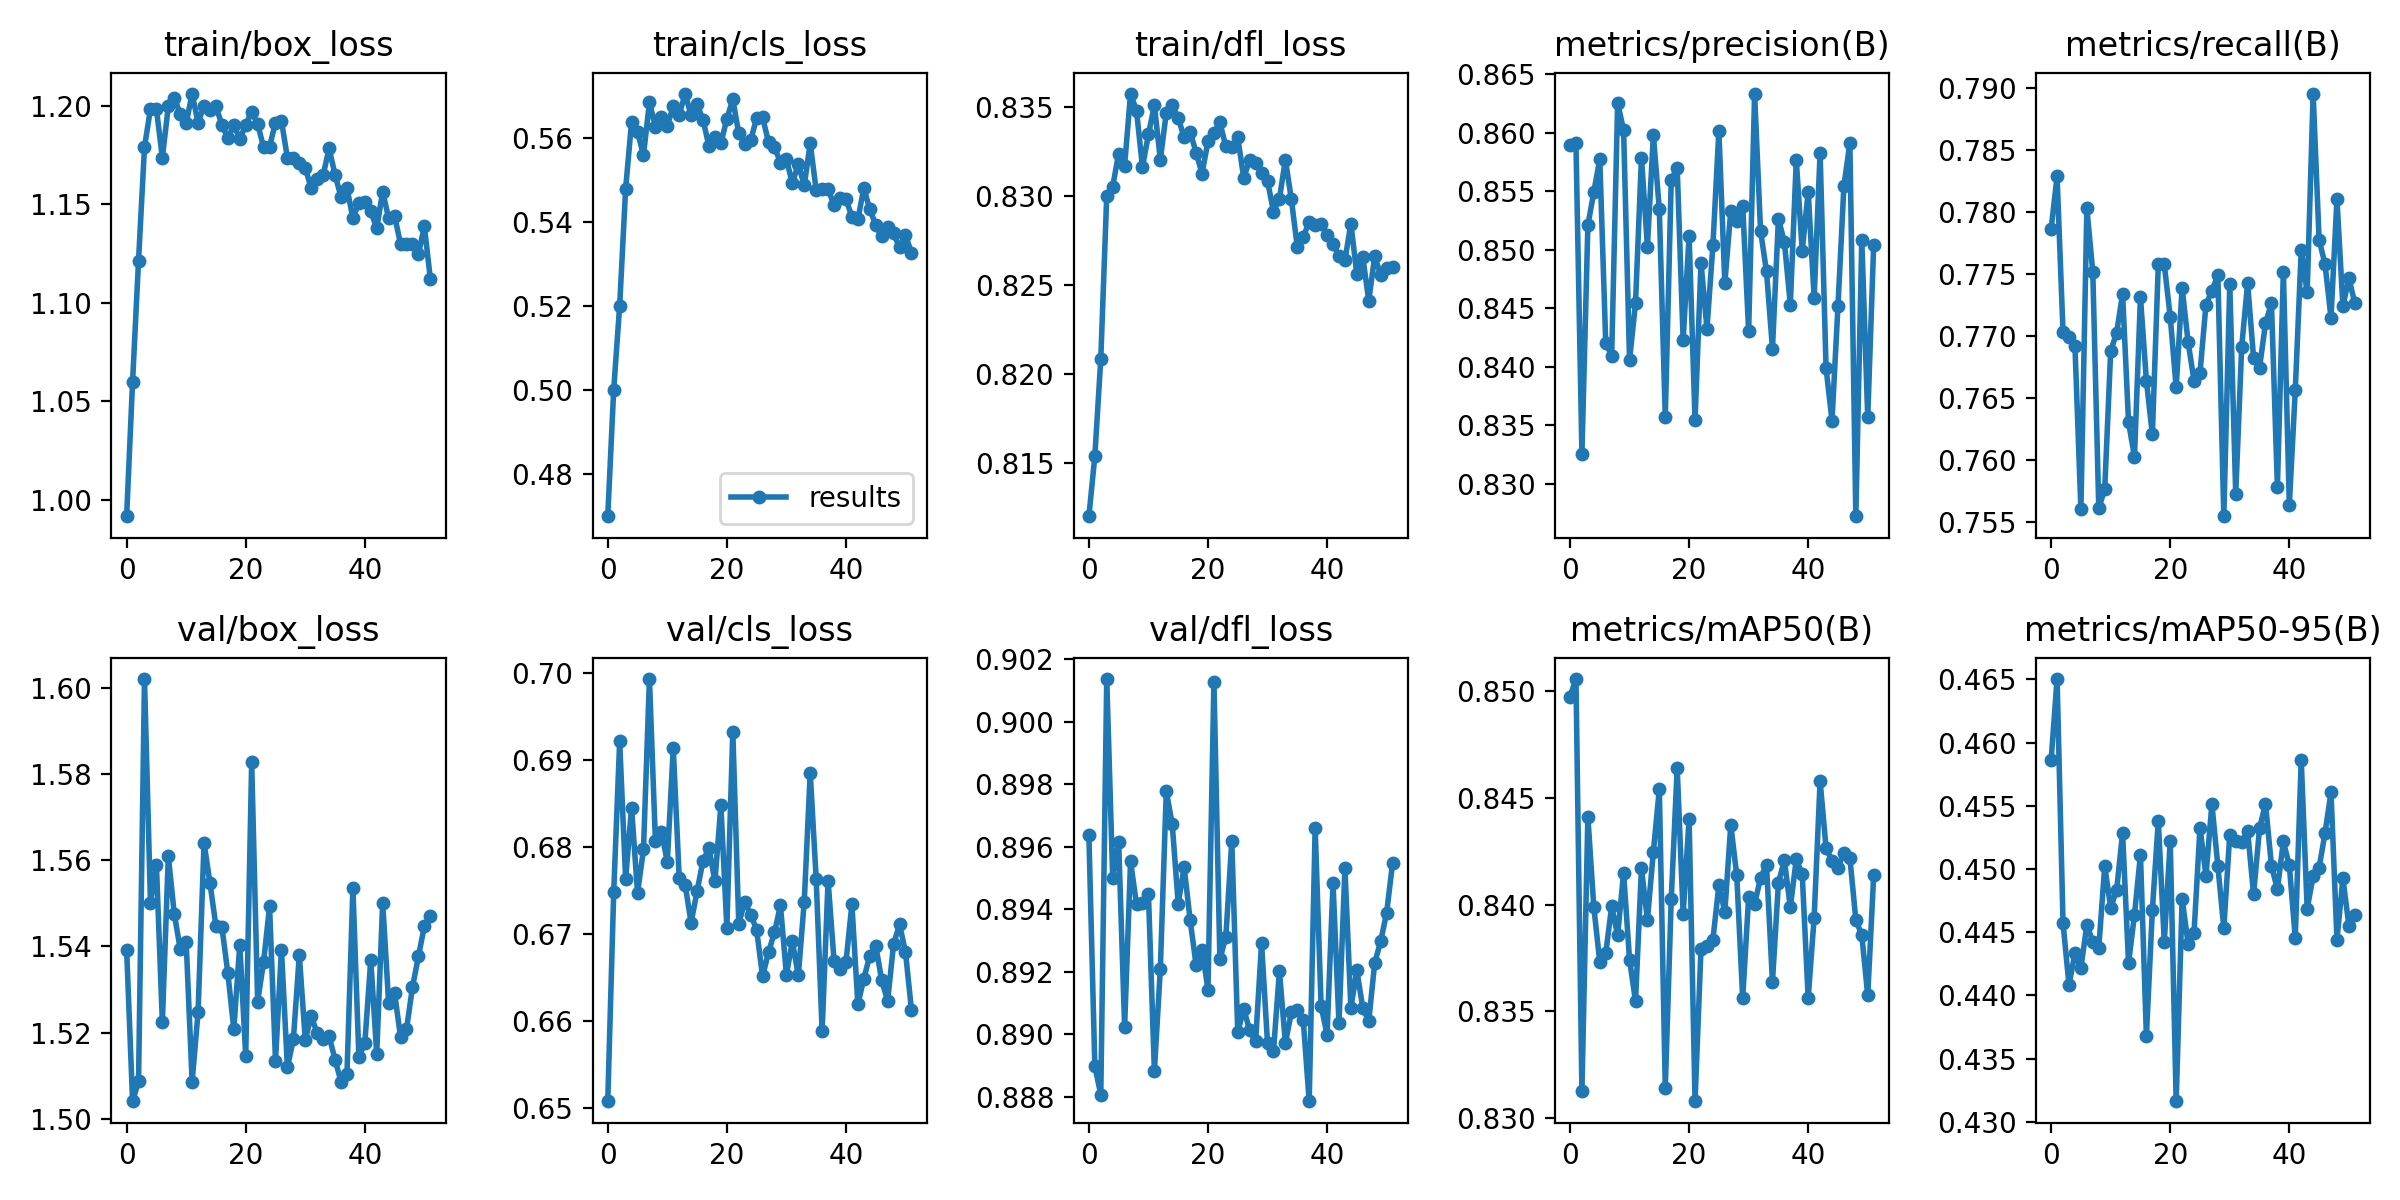

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)

## Validate the Model

The performance on the validation set is close to that on the training set. It seems there is no overfitting, and the model converge well.

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-01 21:51:16.005706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 21:51:16.874043: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-4/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:17<00:00,  1.36s/it]
                   all        200       7992      0.858      0.782       0.85      0.465
Speed: 0.5ms pre-process, 6.2ms infer

## Inference with the Model

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-01 21:53:43.950917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 21:53:44.822640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/100 /content/datasets/MinneApple-4/test/images/20150919_174151_image121_png_jpg.rf.b7fc2478313627f87bcbeb831933faf2.jpg: 640x384 106 apples, 61.3ms
image 2/100 /content/datasets/MinneApple-4/test/images/20150919_174151_image161_png_jpg.rf.5e7093b1eab8189a7bb39c635604d7d4.jpg: 640x384 115 apples, 10.8ms
image 3/100 /content/datasets/MinneApple-4/test/images/20150919_174151_imag

**NOTE:** Let's take a look at few results.

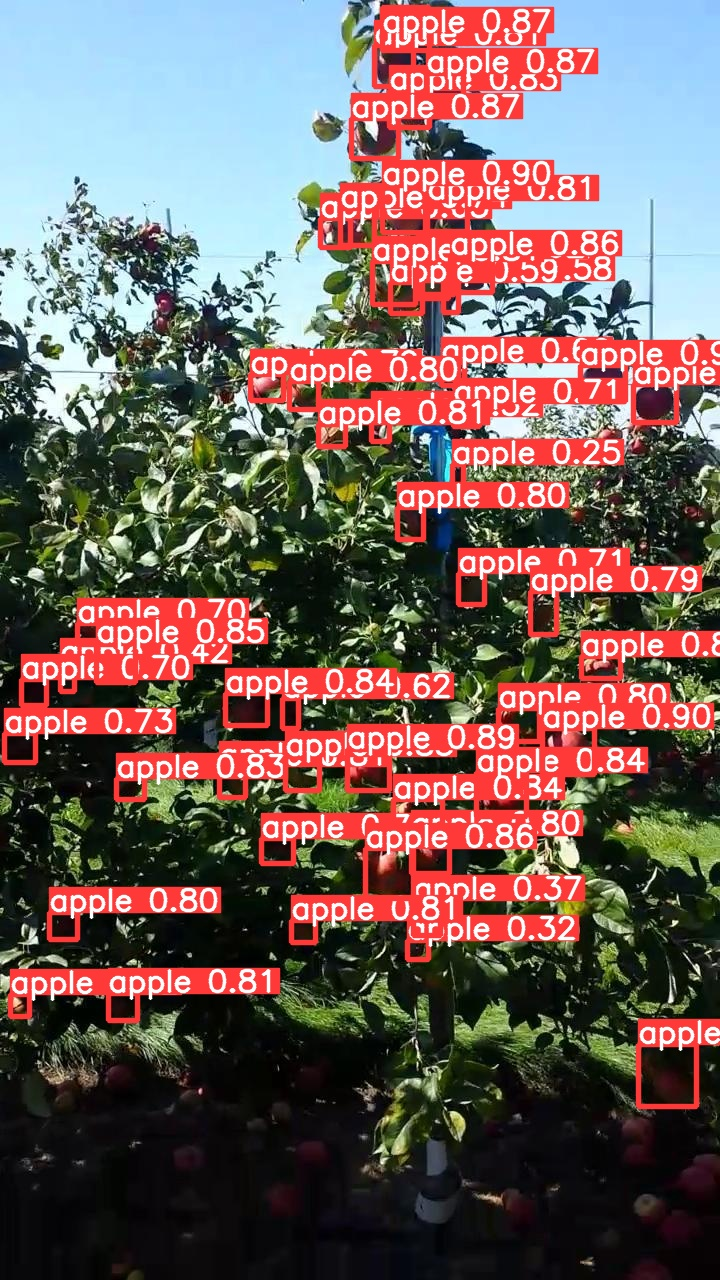

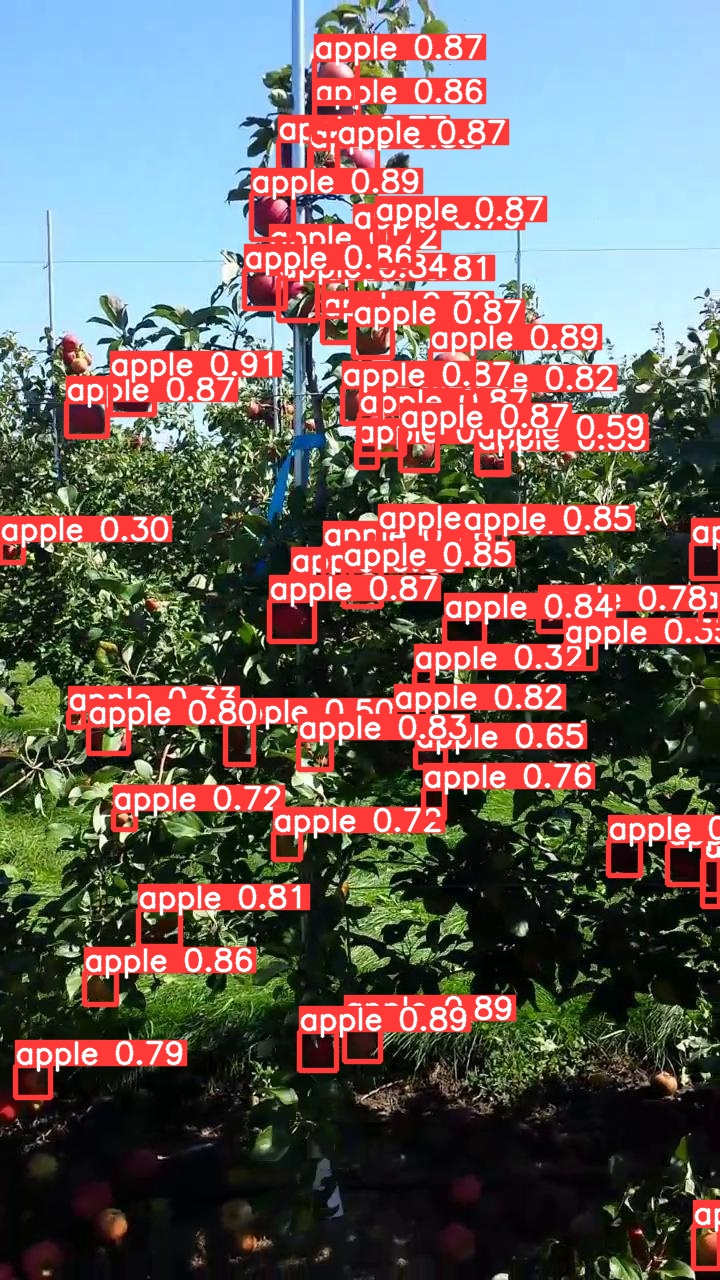

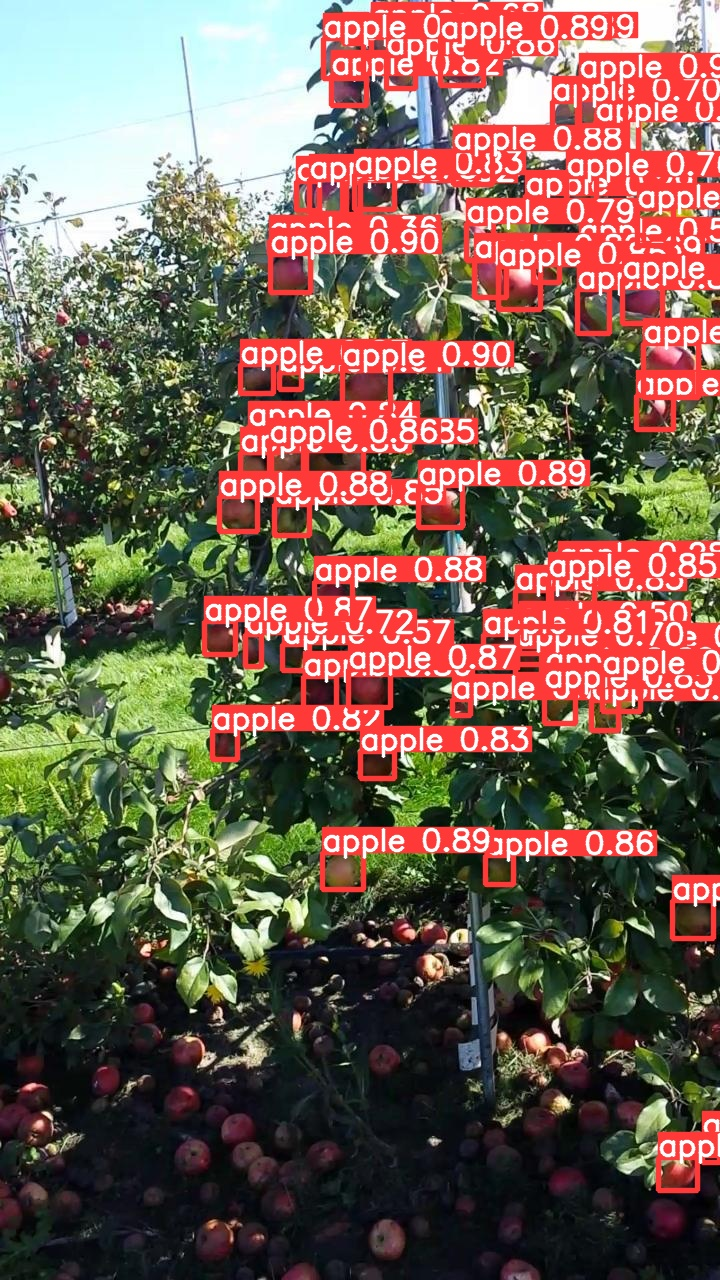

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

Produce the performance of the model on the test set.

All other metrics are much higher than the training and validating reaults

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data_test.yaml

/content
2023-08-01 21:54:34.718318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 21:54:35.574020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-1/test/labels... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<00:00, 1381.70it/s]
val: New cache created: /content/datasets/MinneApple-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:16<00:00,  2.39s/it]
                   all        100       3943      0.